# Iris Multi-class Classification with K-NN

###  Import libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Load the Iris dataset

In [17]:
iris = load_iris(as_frame=True)   
iris_df = iris.frame              

print(type(iris_df))   
iris_df.head()

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
iris = load_iris(as_frame=True)   
iris_df = iris.data              

print(type(iris_df))   
iris_df.head()

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# Other way to load dataset
iris = load_iris(as_frame=True)
X = iris.data      # DataFrame with features
y = iris.target    # Series with target codes

# Combine features and target into one DataFrame
iris_df = X.copy()           # copy features
iris_df['target'] = y        # add target column

# Optionally map target numbers to species names
iris_df['species'] = iris_df['target'].map(lambda i: iris.target_names[i])

# Print first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Split into training and test sets (e.g. 80% train, 20% test)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Train KNN classifiers for different k values and record accuracy

In [29]:
k_values = [1, 3, 5, 7]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)


### Train logistic regression and record accuracy

In [30]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_lr)

### Plot accuracy vs. k, with logistic regression as a horizontal line

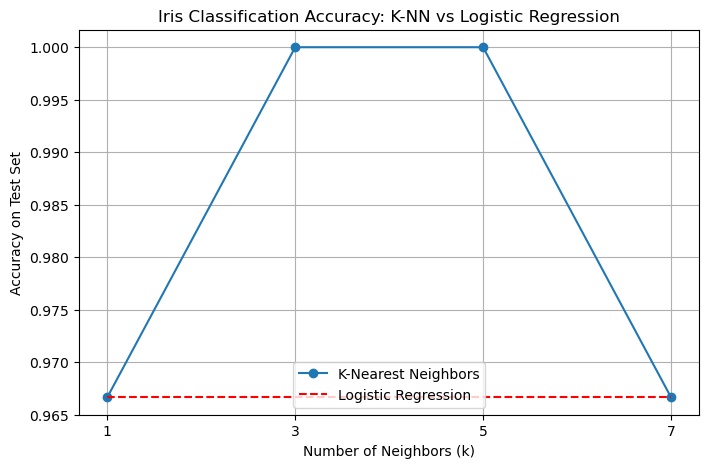

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracies, marker='o', label='K-Nearest Neighbors')
plt.hlines(logreg_accuracy, xmin=min(k_values), xmax=max(k_values),
           colors='r', linestyles='--', label='Logistic Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy on Test Set')
plt.title('Iris Classification Accuracy: K-NN vs Logistic Regression')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()